<a href='https://www.lendingclub.com/'><img src='Images/lendingclub.png' width=300 height=300/></a>
# <center>LendingClub Loan Analysis<center/>

## Table of Contents:
1. <a href="#1.-Data-Cleaning">Data Cleaning</a> <br>
    1.1 <a href="#1.1-Packages-to-be-Imported">Packages to be Imported</a> <br>
    1.2 <a href="#1.2-General-Info-about-the-Dataset">General Info about the Dataset</a> <br>
    1.3 <a href="#1.3-Dealing-with-Missing-Values">Dealing with Missing Values</a> <br>
<br>
2. <a href="#2.-Exploratory-Data-Analysis-(EDA)">Exploratory Data Analysis (EDA)</a> <br>
    2.1 <a href="#2.1-Loan-Status-by-Categories">Loan Status by Categories</a> <br>
    2.2 <a href="#2.2-Total-Loans-Issued-by-Year">Total Loans Issued by Year</a> <br>
    2.3 <a href="#2.3-Loan-Amount-by-Barrower-Purposes">Loan Amount by Barrower Purposes</a> <br>
    2.4 <a href="#2.4-Loan-Status-by-Borrower-Purpose">Loan Status by Borrower Purposes</a> <br>
    2.5 <a href="#2.5-Interest-Rate-by-Grade-Category">Interest Rate by Grade Category</a> <br>
    2.6 <a href="#2.6-Loan-Status-by-Grade-Category">Loan Status by Grade Category</a> <br>
    2.7 <a href="#2.7-Good-loan-vs-Bad-Loan-by-Interest-Rate">Good Loan vs Bad Loan by Interest Rate</a> <br>
    2.8 <a href="#2.8-Distribution-of-Homeownership">Distribution of Homeownership</a> <br>
    2.9 <a href="#2.9-Loan-Status-by-Homeownership">Loan Status by Homeownership</a> <br>
    2.10 <a href="#2.10-Loan-Status-by-Employment-Length">Loan Status by Employment Length</a> <br>
    2.11 <a href="#2.11-Correlation-Between-Features">Correlation Between Features</a> <br>
<br>    
3. <a href="#3.-Feature-Selection">Feature Selection</a> <br>
    3.1 <a href="#3.1-Dealing-with-the-Rows-Which-Contain-Missing-Values">Dealing with the Rows Which Contain Missing Values</a> <br>
    3.2 <a href="#3.2-Converting-Loan-Status-into-Good-or-Bad-Loan">Converting Loan Status into Good or Bad Loan</a> <br>
    3.3 <a href="#3.3-Feature-Selection-for-Object-Data-Type">Feature Selection for Object Data Type</a> <br>
    3.4 <a href="#3.4-One-Hot-Encoding">One Hot Encoding</a> <br>
<br>
4. <a href="#4.-Model-Building-(Imbalanced-Data)">Model Building (Imbalanced Data)</a> <br>
    4.1 <a href="#4.1-Splitting-Data-into-Training-and-Test-Sets">Splitting Data into Training and Test Sets</a> <br>
    4.2 <a href="#4.2-Feature-Scaling">Feature Scaling</a> <br>
    4.3 <a href="#4.3-Model-Fitting">Model Fitting</a> <br>
    4.3.1 <a href="#4.3.1-Logistic-Regression">Logistic Regression</a> <br>
    4.3.2 <a href="#4.3.2-Decision-Tree">Decision Tree</a> <br>
    4.3.3 <a href="#4.3.3-Random-Forest">Random Forest</a>   
<br>
5. <a href="#5.-Model-Building-(Balanced-Data)">Model Building (Balanced Data)</a> <br>
    5.1 <a href="#5.1-Balancing-Training-Dataset---SMOTE">Balancing Training Dataset - SMOTE</a> <br>
    5.2 <a href="#5.2-Model-Fitting">Model Fitting</a> <br>
    5.2.1 <a href="#5.2.1-Logistic-Regression">Logistic Regression</a> <br>
    5.2.2 <a href="#5.2.2-Decision-Tree">Decision Tree</a> <br>
    5.2.3 <a href="#5.2.3-Random-Forest">Random Forest</a> <br>
<br>
6. <a href="#6.-Conclusion">Conclusion</a> <br> 
    


##### About the LendingClub:

LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. The company offers loan trading on a secondary market by bringing borrowers and investors together. The company claims that $15.8 billion in loans has issued for millions of people between the years of 2007 and 2015. LendingClub offers a variety of loan option for consumers and businesses including personal loans, business loans, patient solutions, and K-12 education loans. 

Personal loans can range from \\$1,000 to $40,000 depending upon the information provided and credit report. Two active personal loans is allowed at the same time. Investors, on the other hand, put funds in SEC-registered securities called Member Payment Dependent Notes, which form fractions of loans instead of making loans directly to the borrowers. Investors recive monthly payments out of principal and interest payments. LendingClub makes money by charging borrowers an origination fee and investors a service fee.   

##### Problem Statement:
The ultimate goal of this project is to build a machine learning algorithm in order to correctly predict loan defaulters so that LendingClub can decide whether a person is fit for a loan or not in the future. An exploratory data analysis (EDA) will be initially performed to develop an insight about the data and variables. After getting the data ready for the analysis, various machine learning models will be developed to correctly identify loan defaulters (True positive).   The analyses will also provide insightful recommendations and future steps that the LendingClub managers and investors might want to take into consideration.

##### About the Dataset:
The data for the analyses were acquired from Kaggle.com - Lending Club Loan Data. The data contain about 890 thousand observations and 75 variables including loan amount, funded loan amount, interest rate, credit scores, employment length, homeownership, annual income, address including zip codes, and state, and collections.. A data dictionary is provided in a separate file. The dataset used for this project can be acquired using the following link: https://www.kaggle.com/wendykan/lending-club-loan-data

# 1. Data Cleaning

Before we leap over our analysis in the subsequent chapters, a data wrangling process will be performed to inspect the data, to look for missing values, and to clean data to get ready for the further analysis.

#### 1.1 Packages to be Imported

This section sets up all the necessary packages that will be used throughout this project.

In [1]:
# perform the necessary imports here
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

%matplotlib inline
pd.options.mode.chained_assignment = None

#### 1.2 General Info about the Dataset

Let's start with reading the data into a dataframe and printing its head in order to develop insight about the data.

In [2]:
# read data into a dataframe
df = pd.read_csv('data/loan.csv', low_memory=False)

# print the head of the data to have an insight
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As can be seen from the head of the dataset, there are some columns which have `NaN` values. We will be taking care of those values when dealing with the missing values in the dataset.

In [3]:
# print the shape of the data
df.shape

(887379, 74)

The entire dataset has overall 887,379 rows(observations) and 74 columns(features). 

In [4]:
# print the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Here, we can see a lot of information about our dataset, including total number of entries and columns, column names and data types for each column. Again, we see that there are some columns with a huge number of missing values. We also need to gather further information to check if the values here are consistent using pandas `describe()` method.   

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


Pandas `describe()` method helps us understand the numerical attributes and outliers if any. Out of 887,379 loans provided to the borrowers, the amount of loans given ranges from \\$500 to $35,000 with an average interest rate of 12.99

In [6]:
len(df.id.unique())

887379

Counting the unique values of id attribute shows us how many unique individuals/borrowers we are dealing with. In this case, there are 887,379 individuals which indicates that each enrty is unique to an individual.

#### 1.3 Dealing with the Features with Missing Values

To have a visual insight about the dataset, the following heatmap was produced. Yellow color accounts for the missing values in that particular column. The graph clearly illustrates that some columns, especially the ones near to the right side, have only a few observations/entries. 

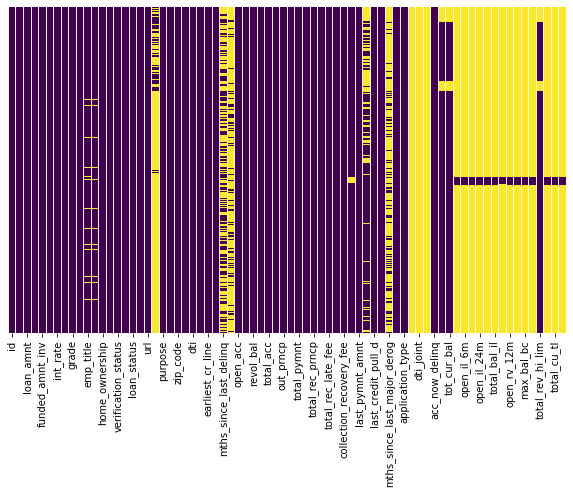

In [7]:
# perform a heatmap analysis for the missing values
_ = plt.figure(figsize=(10,6))
_ = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# display the heatmap
plt.show()

Alternatively, we can print the number of missing values exist per column with their percentages out of the length of the dataframe. 

In [8]:
# creating a separate dataframe to account for the number and percentanges of missing values
df_null = pd.DataFrame({'Count':df.isnull().sum(), 'Percent':100*df.isnull().sum()/len(df)})

# columns that have missing values more than 0
df_null[df_null['Count']>0]

,Count,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
desc,761351,85.797726
title,152,0.017129
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
mths_since_last_record,750326,84.555303


Here, again we confirmed that some columns have only a few entries. Hence, we decided to drop those columns that have 80% or more missing values.   

In [9]:
# drop columns that have 80% or more missing values and assign it to a new dataframe
df1 = df.dropna(axis=1, thresh=int(0.80*len(df))).copy()

In [10]:
# check the shape of the original dataframe
df.shape

(887379, 74)

In [11]:
# check the shape of the new dataframe after dropping the columns with 80% or more missing values
df1.shape

(887379, 52)

After dropping the columns with only a few number of entries, a total of 52 columns were obtained. The following columns were also dropped from the dataframe due to the fact that they have low variance. The "url" column has a unique value for each entry which can lead to overfitting. Hence it needs to be removed from the dataset as well. 

In [12]:
# drop the following collumns
df1.drop(['id', 'member_id', 'policy_code', 'url', 'zip_code', 'last_pymnt_d'], axis=1, inplace=True)

One last time, we need to check the total number of the missing values and the percentages of the missing values for each column. 

In [13]:
# creating a separate dataframe to account for the number and percentanges of missing values
df_null = pd.DataFrame({'Count':df1.isnull().sum(), 'Percent':100*df1.isnull().sum()/len(df1)})

# columns that have missing values more than 0
df_null[df_null['Count']>0]

,Count,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
title,152,0.017129
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
open_acc,29,0.003268
pub_rec,29,0.003268
revol_util,502,0.056571


------------------------

# 2. Exploratory Data Analysis (EDA)

This section focuses on exploratory data analysis (EDA) which allows us to understand emerging themes before moving onto deeper and more complex data analysis. 

#### 2.1 Loan Status by Categories

The following bar plot displays the distribution of loan status by categories. This bar plot gives us insight about how the data are distributed across loan status. A big percentage of loans are currently being paid while a fair amount of loans were fully paid. The other categories, on the other hand, have relatively smaller percentages. The categories of "Charged Off" and "Default" corresponds to respectively %5.10 and 0.14% of the entire loans issued by the LendingClub. These numbers indicate that the data are imbalanced which needs to be taken into account when building our predictive models.

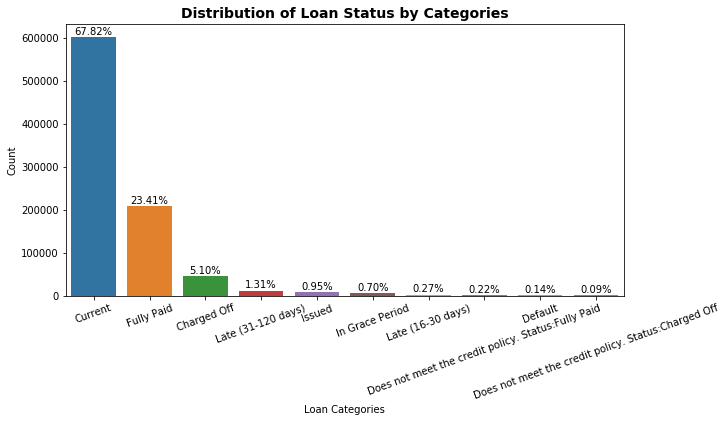

In [14]:
# plot the categories of loan status column
_ = plt.figure(figsize=(10,5))
ax = sns.countplot(x='loan_status', data=df1, order=df1['loan_status'].value_counts().index)
_ = plt.title('Distribution of Loan Status by Categories', fontsize=14, fontweight='bold')
_ = plt.ylabel('Count')
_ = plt.xlabel('Loan Categories')
_ = plt.xticks(rotation=20)

# calculate the percentages of the loan status category
sizes=[]
total_data = len(df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 6000,
            '{:1.2f}%'.format(height/total_data*100), ha="center", fontsize=10)

# display the plot
plt.show()

#### 2.2 Total Loans Issued by Year

The count of total loans issued by the LendingClub over the years displayed below. As can be seen from the chart, the number of loans issued is increasing over the years with the highest in 2015. 

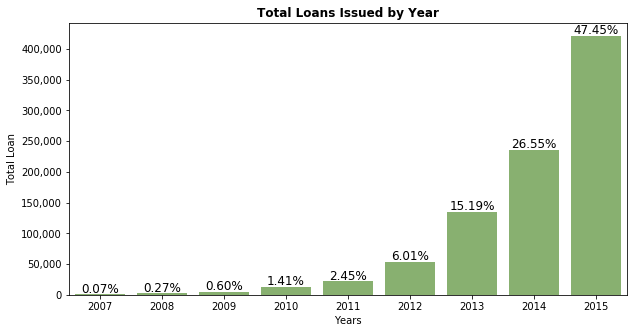

In [15]:
# exract the year and month values from issue_f feature
df1['issue_month'], df1['issue_year'] = df1['issue_d'].str.split('-', 1).str

# create a countplot for total loans issued by year
_ = plt.figure(figsize=(10,5))
ax = sns.countplot(x='issue_year', data=df1, color='#85bb65')
#plt.gca().invert_yaxis()
_ = plt.title('Total Loans Issued by Year', fontsize=12, 
              fontweight='bold')
_ = plt.ylabel('Total Loan')
_ = plt.xlabel('Years')
_ = ax.get_yaxis().set_major_formatter(matplotlib.ticker \
                                       .FuncFormatter(lambda x, p: format(int(x), ',')))

# calculate the percentages of the loan amounts by year
sizes=[]
total_data = len(df1)
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,height + 3000,
            '{:1.2f}%'.format(height/total_data*100),
            ha="center", fontsize=12)

# display the plot
plt.show()

#### 2.3 Loan Amount by Barrower Purposes

The amount of loan issued by the LendingClub varies across the borrowers' purposes listed below. The largest amount of loan was issued for the borrowers with credit card, debt consolidation, and small business purposes. 

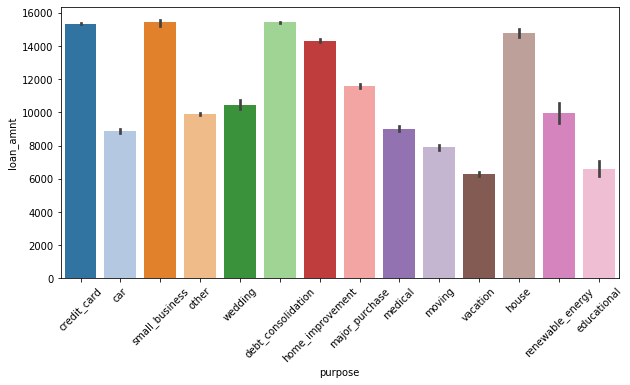

In [16]:
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(x='purpose', y='loan_amnt', data=df1, palette='tab20')
_ = plt.xticks(rotation=45)

#### 2.4 Loan Status by Borrower Purpose

An additional chart is produced below to provide insight about the share of loan status by borrower purpose. Borrowers with educational, small business and wedding purposes have a greater percentage to be charged off than the borrowers with other purposes. 

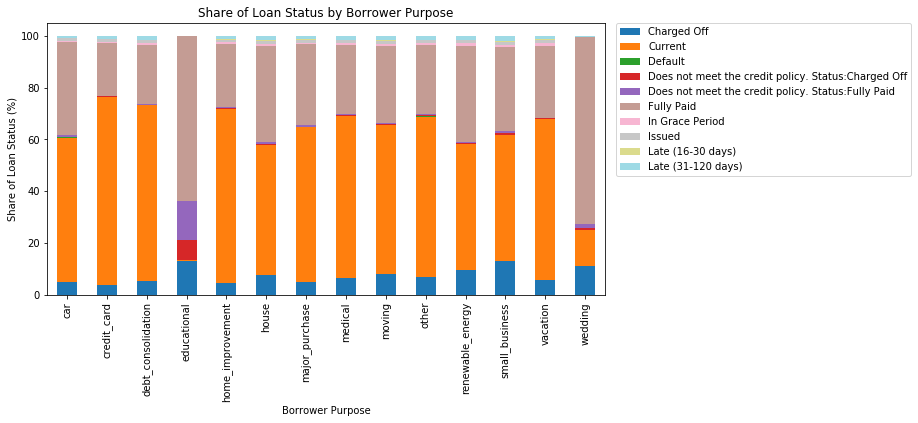

In [17]:
# cross-tabulate "loan status" and "purpose" columns
tab = pd.crosstab(df1['purpose'], df1['loan_status'], 
                  normalize='index')*100

# create a stacked plot 
_ = plt.figure(figsize=(10,5))
_ = tab.plot(kind='bar',stacked=True, ax=plt.gca(), colormap='tab20')
_ = plt.xlabel('Borrower Purpose')
_ = plt.ylabel('Share of Loan Status (%)')
_ = plt.title('Share of Loan Status by Borrower Purpose')
_ = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# display the chart
plt.show()

#### 2.5 Interest Rate by Grade Category

The violinplot below clearly illustrates that interest rate increases as loan grade category moves from A to G. It means that borrowers with a bad loan grade category are likely to have higher interest rate for the loans than the borrowers with a good loan grade category. The violinplot also shows that the average interest rate for the borrowers with "A" laon grade is 7.24, while it is 25.63 for the borrowers with "G" loan grade category. It also must be noted that the variation in interest rate is mostly increasing as the loan grade category moves from "A" to "F".

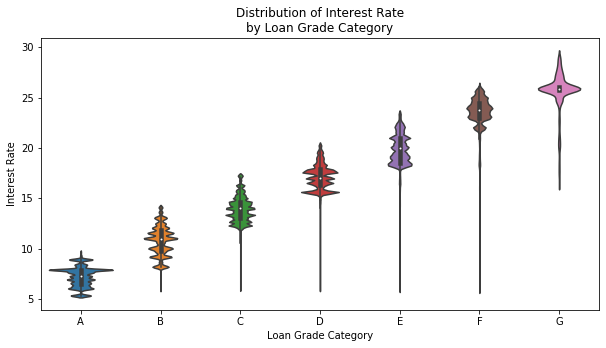

In [18]:
_ = plt.figure(figsize=(10,5))
_ = sns.violinplot(x="grade", y="int_rate", data=df1, order="ABCDEFG")
_ = plt.xlabel('Loan Grade Category')
_ = plt.ylabel('Interest Rate')
_ = plt.title('Distribution of Interest Rate\nby Loan Grade Category')

# display the plot
plt.show()

#### 2.6 Loan Status by Grade Category

The cross-tabulation of loan status and loan grade categories is displayed below. The table shows that almost 70% of the borrowers with "A" loan grade category are currently paying their loans, while almost 27% of them fully paid their loans. The borrowers with a "G" loan grade category have a high percentage of being currently paying their loans. When we look at the loan defaults and charged offs, individuals with "G" loan category have relatively higher percentages to be defaulted or charged off than the other loan grade categories. However, the percentage for loan defaults is relatively small only at 0.4% .     

In [19]:
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df1['loan_status'], df1['grade'], 
                  normalize='columns')*100,2) \
      .style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,1.77,3.74,5.14,7.51,8.85,12.73,14.43
Current,69.72,67.47,69.62,65.92,66.56,58.96,53.07
Default,0.03,0.08,0.15,0.22,0.28,0.34,0.4
Does not meet the credit policy. Status:Charged Off,0.01,0.03,0.06,0.14,0.22,0.4,1.31
Does not meet the credit policy. Status:Fully Paid,0.06,0.11,0.2,0.35,0.53,0.67,2.22
Fully Paid,26.77,26.14,21.43,21.51,18.28,20.51,20.88
In Grace Period,0.25,0.49,0.77,1.01,1.28,1.54,1.71
Issued,0.98,0.99,1.01,0.85,0.84,0.84,0.71
Late (16-30 days),0.09,0.16,0.28,0.41,0.52,0.67,0.78


#### 2.7 Good loan vs Bad Loan by Interest Rate

Here, we convert the loan status categories into good loan and bad loan and check to see whether the LendingClub give significantly different interest rate for good loans and bad loans. 

__$H_{0}$ :__ Good loans and bad loans are not different in terms of interest rates. <br>
__$H_{a}$ :__ Good loans and bad loans are different in terms of interest rates.

The small p value (<0.05) indicates that we need to reject the null hypothesis. It means that good loans and bad loans are different in terms of interest rates. In other words, theL LendingClub give significantly different interest rates for the loan categories which are considered to be good and for the loan categories which are considered to be bad.  

In [20]:
# the loan status categories to be coverted to bad loan
bad_loan = ['Charged Off', 'Default', 'Late (16-30 days)','Late (31-120 days)']

def convert_loan_status(status):
    """This function converts the loan status feature into good or bad loan"""
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'

# apply the function above to the "loan_status" feature
df['loan_status_temp'] = df['loan_status'].apply(convert_loan_status)

In [21]:
# extract interest rate for good loans and bad loans
bad_loan = df['int_rate'][df['loan_status_temp']=='Bad Loan'] 
good_loan = df['int_rate'][df['loan_status_temp']=='Good Loan'] 

In [22]:
# mean and standard deviation of interest rate for good loans and bad loans
bad_loan_mean = np.mean(bad_loan)
print(f'Average interest rate for bad loans is {bad_loan_mean}')

good_loan_mean = np.mean(good_loan)
print(f'Average interest rate for bad loans is {good_loan_mean}')

Average interest rate for bad loans is 16.003861292723457
Average interest rate for bad loans is 13.045314342628133


In [23]:
t, p_val = stats.ttest_ind(bad_loan, good_loan, equal_var = False)
print(t, p_val)

162.80377190990728 0.0


#### 2.8 Distribution of Homeownership

The distribution of homeownership shows that almost 50% of the borrowers have Mortgage, followed by the borrowers who are paying rent with a percentage of 40.13%. The borrowers who own homes correspond to 9.86% of the all the individuals applied for the loan from the LendingClub.

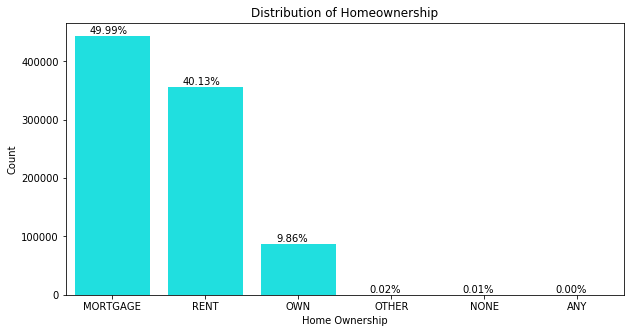

In [24]:
_ = plt.figure(figsize=(10,5))
ax = sns.countplot(x='home_ownership', data=df1, 
                   order = df1['home_ownership'].value_counts().index, 
                   color='cyan')
_ = plt.xlabel('Home Ownership')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of Homeownership')

total = len(df1)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 5
    y = p.get_y() + p.get_height() + 4000
    ax.annotate(percentage, (x, y))

# display the plot
plt.show()

#### 2.9 Loan Status by Homeownership

The cross-tabulation of loan status and homeownership features is provided below. The table shows that almost 70% of the borrowers with Mortgage is currently paying for their loans to the LendingClub, while almost 24% of them fully paid their loans. A big percentage of the borrowers who pay rent for their homes are similarly currently paying their loans. However, they have greater percentage to be charged off for their loans than the borrowers with Mortgage.  

In [25]:
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df1['loan_status'], df1['home_ownership'],
                  normalize='columns')*100,2) \
     .style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0,4.48,14,14.84,4.6,5.98
Current,66.67,68.48,4,1.65,70.93,66.26
Default,0,0.11,0,0,0.13,0.17
Does not meet the credit policy. Status:Charged Off,0,0.08,2,6.04,0.06,0.1
Does not meet the credit policy. Status:Fully Paid,0,0.2,8,14.84,0.16,0.26
Fully Paid,33.33,23.66,72,62.64,20.53,23.77
In Grace Period,0,0.64,0,0,0.73,0.78
Issued,0,0.95,0,0,1.19,0.9
Late (16-30 days),0,0.25,0,0,0.3,0.28


#### 2.10 Loan Status by Employment Length

The length of employment is another factor considered before issuing loans by the loan companies. However, as the cross-tabulation table indicates, there is no clear pattern between the loan status categories and the length of employment.

In [26]:
cm = sns.light_palette("red", as_cmap=True)
round(pd.crosstab(df1['loan_status'],df1['emp_length'],
                  normalize='columns') * 100,2) \
     .style.background_gradient(cmap = cm)

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,5.19,4.5,5.11,5.05,5.28,5.75,6.27,5.83,4.9,5.13,5.46
Current,66.39,70.25,66.36,66.99,65.45,64.05,62,65.14,69.39,68.81,66.03
Default,0.17,0.13,0.11,0.15,0.13,0.14,0.15,0.16,0.17,0.14,0.13
Does not meet the credit policy. Status:Charged Off,0.16,0.05,0.11,0.1,0.11,0.09,0.1,0.07,0.07,0.06,0.16
Does not meet the credit policy. Status:Fully Paid,0.45,0.11,0.34,0.28,0.28,0.22,0.24,0.15,0.17,0.18,0.51
Fully Paid,24.33,21.86,24.76,24.06,25.55,26.67,28.07,25.75,22.06,22.48,24.12
In Grace Period,0.73,0.68,0.72,0.8,0.69,0.66,0.75,0.71,0.76,0.73,0.74
Issued,0.96,0.97,0.89,0.97,0.93,0.92,0.75,0.59,0.97,0.85,1.09
Late (16-30 days),0.26,0.24,0.27,0.27,0.3,0.28,0.24,0.26,0.25,0.32,0.32


#### 2.11 Correlation Between Features

Before looking at the correlation structure between the features in our project, we need to convert the features with "Object" data type to "Categorical" data type. A total of 19 features has object data type. 

In [27]:
# define a temporary data frame
df_temp = df1.copy()

In [28]:
# select the features with "Object" data type
df_Obj = df_temp.select_dtypes(include='object')

# check the number of columns with "Object" data type
df_Obj.shape

(887379, 19)

In [29]:
# define a lambda function to be used to convert object type to 
# categorical data type
categorize_label = lambda x: x.astype('category').cat.codes

# convert the columns with "Object" data type to "Categorical" data type
df_temp[df_Obj.columns] = df_temp[df_Obj.columns].apply(categorize_label, axis=0)

Since we have so many columns, we divide the entire dataset into two parts in order to create the correlation matrix using the heatmap below. 

In [30]:
temp_features=df_temp.drop('loan_status',axis=1).columns
x1=list(temp_features[:24])
x1.append('loan_status')
x2=list(temp_features[24:len(temp_features)])
x2.append('loan_status')

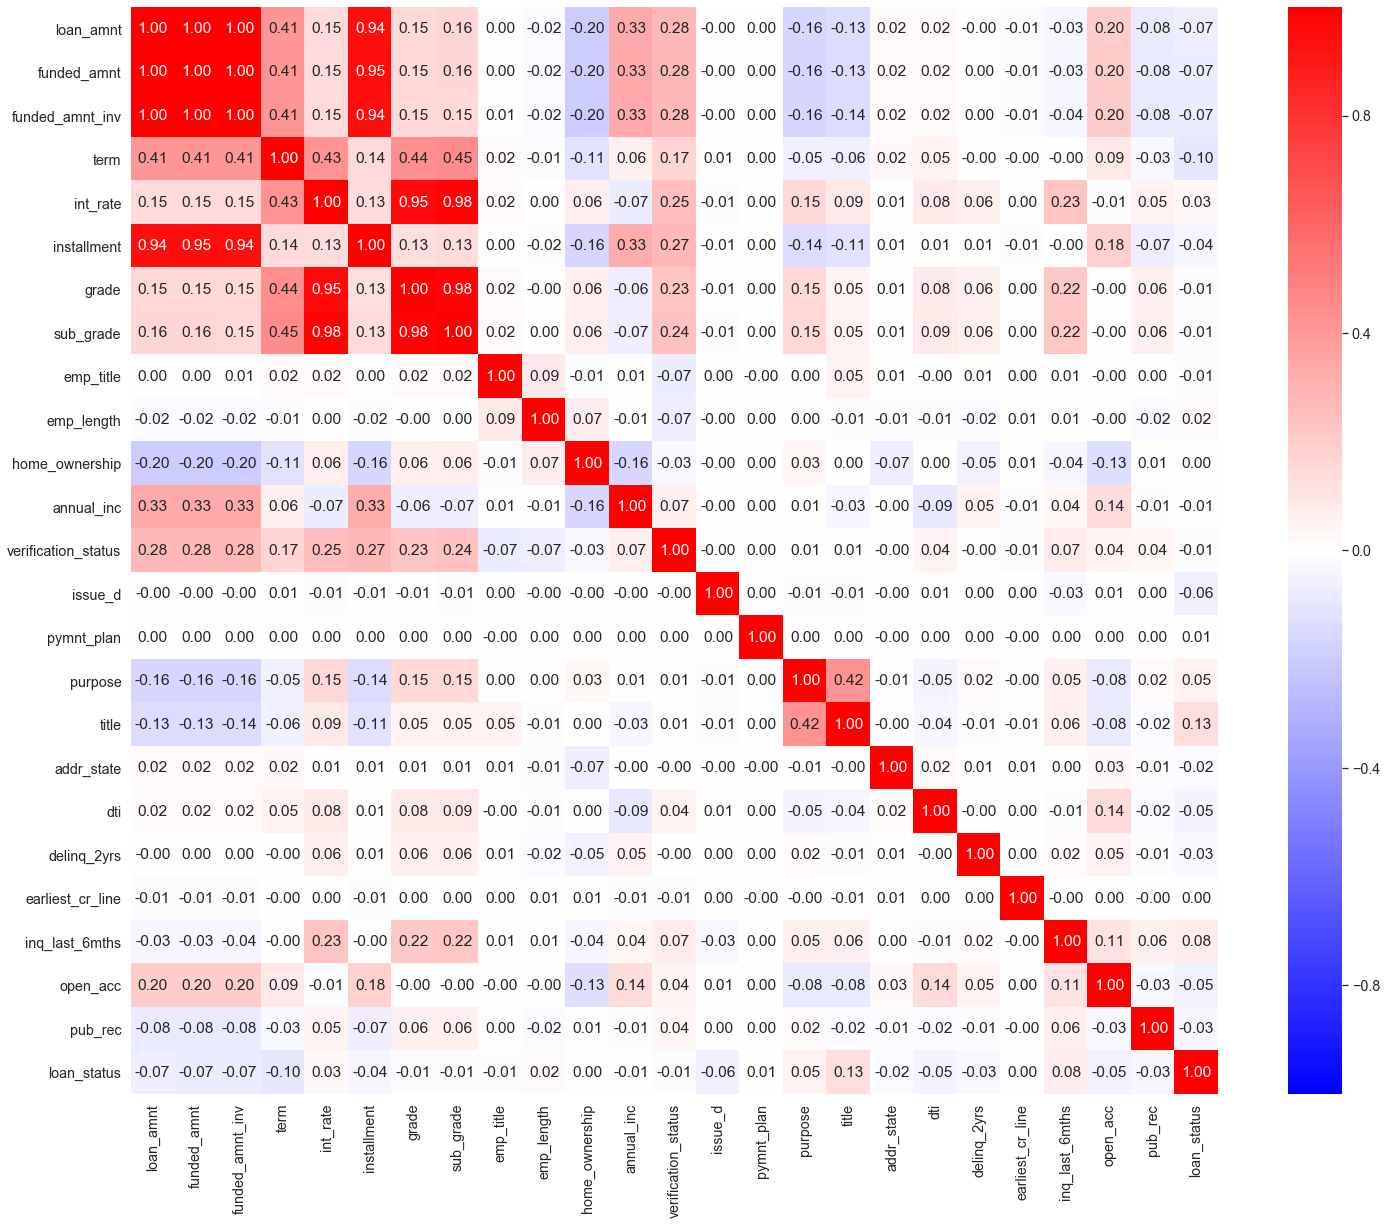

In [31]:
_ = plt.figure(figsize=(25,20))
_ = sns.set(font_scale=1.3)
ax = sns.heatmap(df_temp[x1].corr(), vmin=-1, vmax=1,square=True, 
                 annot=True, cmap='bwr', cbar=True, fmt=".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# display the heatmap
plt.show()

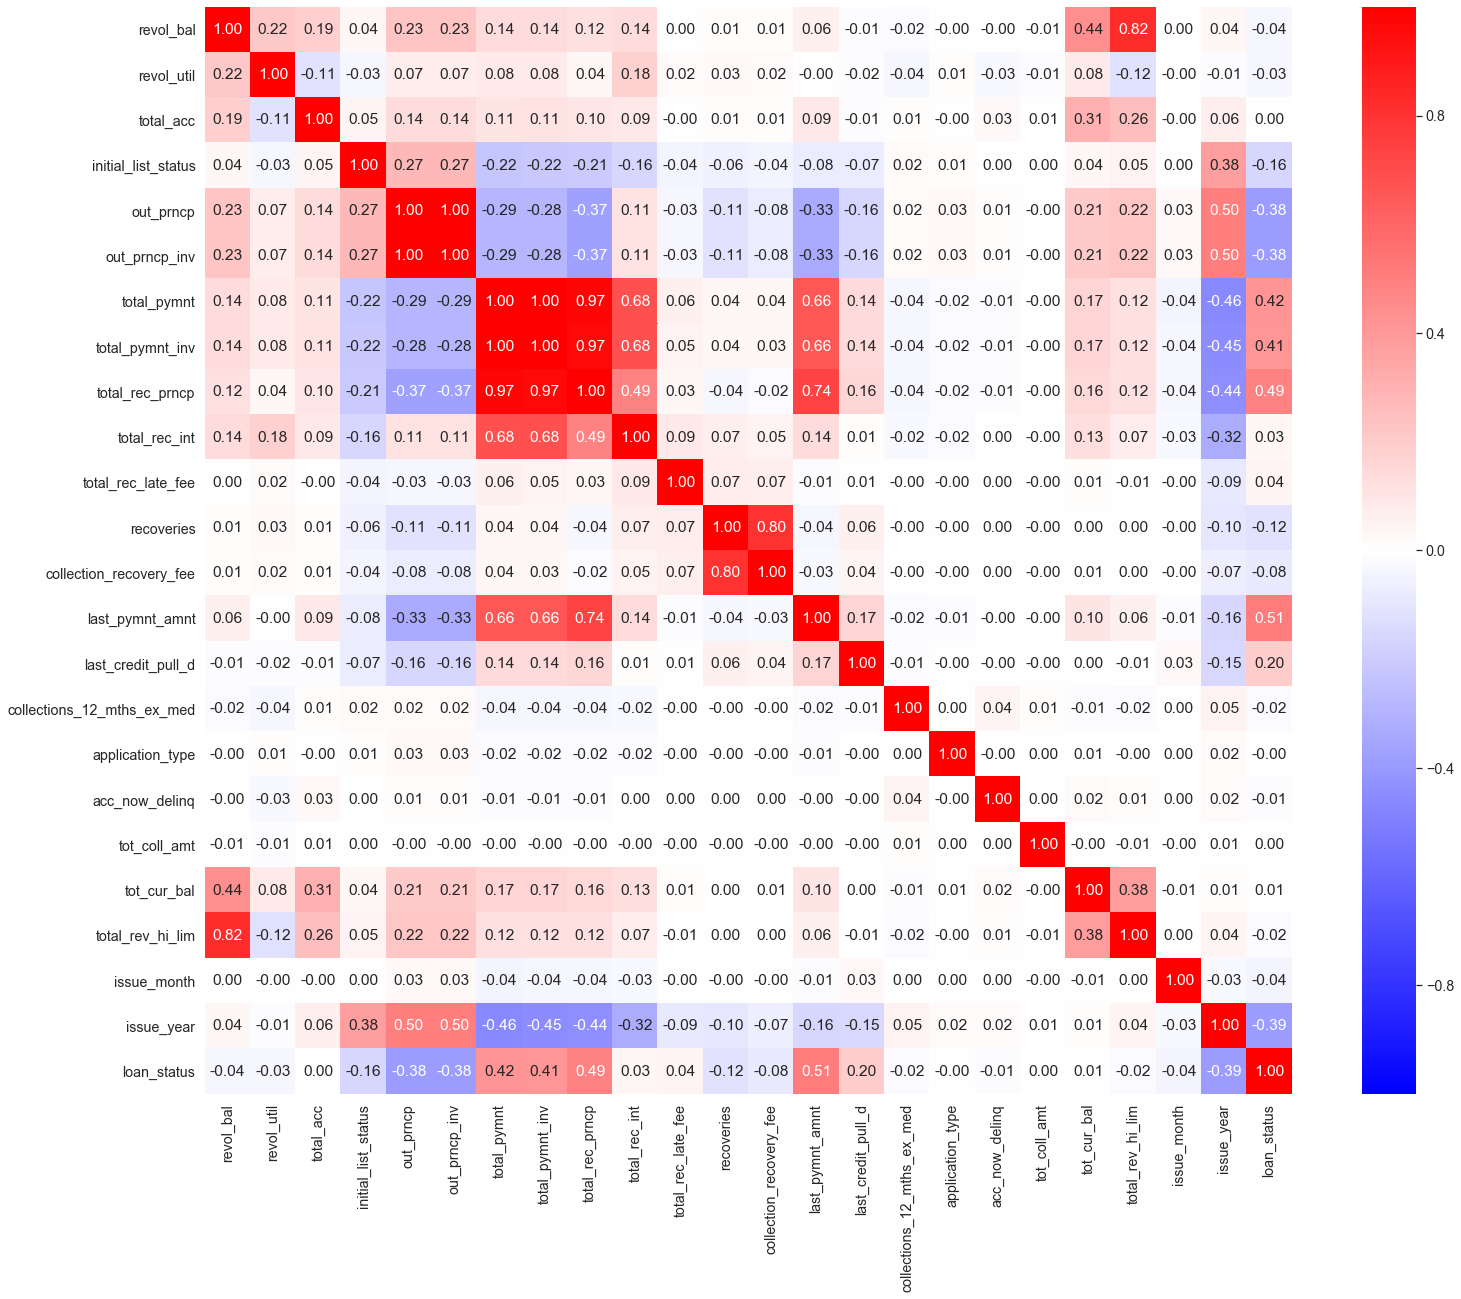

In [32]:
_ = plt.figure(figsize=(25,20))
ax = sns.heatmap(df_temp[x2].corr(), vmin=-1, vmax=1,square=True, 
                 annot=True, cmap='bwr', cbar=True, fmt=".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# display the heatmap
plt.show()

The correlation heapmap above clearly illustrates the relationships between the variables of interest. While the red color indicates a positive correlation between the two variables, blue color indicates negative correlation. The strength of correlations have also been added on the heatmap above. As an example, there is a positive strong correlation between loan amount and installment as expected. It also must be noted that correlation does not imply causation.

The features with high correlation will also be dropped in the following section, because only one of them will be suffice to feed the machine learning models. 

--------------

# 3. Feature Selection

#### 3.1 Dealing with the Rows Which Contain Missing Values 

We need to deal with the rows which contain missing values before building our models to predict loan defeaulters. There is no need to impute the missing values since we have sufficient amount of data. Hence, the rows that contain missing values will be dropped from our dataset.

In [33]:
df1.dropna(axis=0, inplace=True)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769128 entries, 42535 to 887378
Data columns (total 48 columns):
loan_amnt                     769128 non-null float64
funded_amnt                   769128 non-null float64
funded_amnt_inv               769128 non-null float64
term                          769128 non-null object
int_rate                      769128 non-null float64
installment                   769128 non-null float64
grade                         769128 non-null object
sub_grade                     769128 non-null object
emp_title                     769128 non-null object
emp_length                    769128 non-null object
home_ownership                769128 non-null object
annual_inc                    769128 non-null float64
verification_status           769128 non-null object
issue_d                       769128 non-null object
loan_status                   769128 non-null object
pymnt_plan                    769128 non-null object
purpose                       7

#### 3.2 Converting Loan Status into Good or Bad Loan

In [35]:
# diplay the unique categories of loan status feature
df1.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'Charged Off', 'In Grace Period', 'Default', 'Issued'],
      dtype=object)

The target feature of this dataset is "Loan Status" which has 8 different categories after dropping the rows with missing values. For the purpose of this project, we need to convert the loan status feature into "Good Loan" or "Bad Loan" based on the description of loan status categories. The categories of "Current", "Fully Paid", and "Issued" were considered as a good loan. The category of "In Grace Perid" can be considered to be good or bad depending upon the strictness of investor. It was treated as a good loan in this project. The categories of "Late (16-30 days)", "Late (31-120 days)", "Charged Off" and "Default" were converted to a bad loan.  

The dataset is highly imbalanced in the way that the number of bad loans is only 46,539 out of 769,128 which corresponds to 6.05% of the entire dataset. 

In [36]:
# the loan status categories to be coverted to bad loan
bad_loan = ['Charged Off', 'Default', 'Late (16-30 days)','Late (31-120 days)']

def convert_loan_status(status):
    """This function converts the loan status feature into good or bad loan"""
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'

# apply the function above to the "loan_status" feature
df1['loan_status'] = df1['loan_status'].apply(convert_loan_status)

In [37]:
df1['loan_status'] = df1['loan_status'].astype('category').cat.codes

# print the number of good and bad loans
df1.loan_status.value_counts()

1    722589
0     46539
Name: loan_status, dtype: int64

#### 3.3 Feature Selection for Object Data Type

18 features have object data type in our dataset.

In [38]:
# select the features with "Object" data type
df1_Obj = df1.select_dtypes(include='object')

df1_Obj.shape

(769128, 18)

In [39]:
# description of features with "Object" data type
df1_Obj.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type,issue_month,issue_year
count,769128,769128,769128,769128,769128,769128,769128,769128,769128,769128,769128,769128,769128,769128,769128,769128,769128,769128
unique,2,7,35,259937,11,6,3,41,2,14,36725,51,677,2,42,2,12,4
top,36 months,B,B4,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,debt_consolidation,Debt consolidation,CA,Aug-2001,w,Jan-2016,INDIVIDUAL,Oct,2015
freq,528375,219127,48199,13453,272311,389615,301708,45670,769122,463101,390139,110824,6012,407017,664927,768687,101407,396723


According to the descriptive statistics of the features that have object data type, several of the features needs to be dropped due to the fact that they have a large number of unique values which leads to memory error. The features with high correlation will also be dropped because only one of them will be suffice to feed the machine learning models. Lastly, some features will be dropped from the dataset since they do not provide valuable info for further analysis. Those include the following features:

    . emp_title
    . issue_d
    . title
    . addr_state
    . earliest_cr_line
    . last_credit_pull_d
    . funded_amnt
    . funded_amnt_inv
    . sub_grade
    . total_rec_prncp
    . total_rev_hi_lim
    . issue_month
    . issue_year
    . term
    . verification_status

In [40]:
# features to be dropped
df1.drop(['emp_title', 'issue_d', 'title', 'addr_state', 
          'earliest_cr_line', 'last_credit_pull_d', 'funded_amnt',
          'funded_amnt_inv', 'sub_grade','total_rec_prncp', 
          'total_rev_hi_lim', 'issue_month', 'issue_year',
          'term', 'verification_status'], axis=1, inplace=True)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769128 entries, 42535 to 887378
Data columns (total 33 columns):
loan_amnt                     769128 non-null float64
int_rate                      769128 non-null float64
installment                   769128 non-null float64
grade                         769128 non-null object
emp_length                    769128 non-null object
home_ownership                769128 non-null object
annual_inc                    769128 non-null float64
loan_status                   769128 non-null int8
pymnt_plan                    769128 non-null object
purpose                       769128 non-null object
dti                           769128 non-null float64
delinq_2yrs                   769128 non-null float64
inq_last_6mths                769128 non-null float64
open_acc                      769128 non-null float64
pub_rec                       769128 non-null float64
revol_bal                     769128 non-null float64
revol_util                   

#### 3.4 One Hot Encoding

After dropping the features with low variance and high correlation, we ended up with 7 features that have "object" data type. These features need to be converted into numerical data type because machine learning algorithms will not work with categorical variables. To convert these features, we can either use "Label Encoder" available in Python or "One Hot Encoder". Since most of the features with "object" data type have multiple categories, it would be inappropriate to use the "Label Encoder". Instead, we will go with "One Hot Encoder" to convert these features into numerical data type. 

In [42]:
df1 = pd.get_dummies(df1, drop_first=True)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769128 entries, 42535 to 887378
Data columns (total 63 columns):
loan_amnt                     769128 non-null float64
int_rate                      769128 non-null float64
installment                   769128 non-null float64
annual_inc                    769128 non-null float64
loan_status                   769128 non-null int8
dti                           769128 non-null float64
delinq_2yrs                   769128 non-null float64
inq_last_6mths                769128 non-null float64
open_acc                      769128 non-null float64
pub_rec                       769128 non-null float64
revol_bal                     769128 non-null float64
revol_util                    769128 non-null float64
total_acc                     769128 non-null float64
out_prncp                     769128 non-null float64
out_prncp_inv                 769128 non-null float64
total_pymnt                   769128 non-null float64
total_pymnt_inv         

# 4. Model Building (Imbalanced Data)

As mentioned above, our target feature of loan status is highly imbalanced. Therefore, we would like to see if balancing the data makes difference in predicting bad loans. But first, we want to go with the unbalanced data. Following that, we will balance the data using SMOTE and compare the results.

In this section, 4 machine learning algorithm will be used to predict bad loans which include logistic regression, decision tree, random forest, and k-neighbors.  

#### 4.1 Splitting Data into Training and Test Sets

In [44]:
# extract the features and the response variable
y = df1['loan_status']
X = df1.drop('loan_status', axis=1)

In [45]:
# Splitting the dataset in training (75%) and testing set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=y)

#### 4.2 Feature Scaling

Here, we scaled train and test dataset using Scikit-learn's StandardScaler which standardize features by removing the mean and scaling to unit variance. The scaling performed only on continuous numeric features. Categorical features that were converted to dummy variables were excluded from scaling.

In [46]:
# scale X_train numeric continuous features
scaler = StandardScaler()
numeric_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')].to_list()
scaler.fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

In [47]:
# scale X_test numeric continuous features
numeric_cols = X_test.columns[(X_test.dtypes == 'float64') | (X_test.dtypes == 'int64')].to_list()
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [48]:
y_train.value_counts()

1    541942
0     34904
Name: loan_status, dtype: int64

#### 4.3 Model Fitting

    . Logistic Regression
    . Decision Tree
    . Random Forest

#### 4.3.1 Logistic Regression

Logistic regression is our first candidate for model algorithms. After performing 3-fold cross-validation, logistic regression provides an average accuracy score of 0.98. Since the data is highly imbalanced, we also provided some model evaluation reports such as confusion matrix and classification report which will be used to evaluate and compare our models.

The logistic regression did pretty well in predicting the good and bad loans. 

In [49]:
# instantiate Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Compute 3-fold cross-validation scores
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=3, scoring='accuracy')

# Print the 3-fold cross-validation scores
print("Average 3-Fold CV Accuracy Score: {}".format(np.mean(logreg_cv)))

Average 3-Fold CV Accuracy Score: 0.98083717317967


              precision    recall  f1-score   support

           0       0.99      0.69      0.81     11635
           1       0.98      1.00      0.99    180647

    accuracy                           0.98    192282
   macro avg       0.98      0.84      0.90    192282
weighted avg       0.98      0.98      0.98    192282



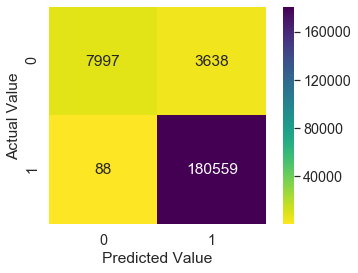

In [50]:
# model prediction for logistic regression
# Fit it to the data
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)

# generate the classification report
print(classification_report(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# display the plot
plt.show()

#### 4.3.2 Decision Tree

Our second candidate for the model algortithms is decision tree. Again, we performed 3-fold cross validation to see average accuracy score. The model resulted with an average accuracy score of 0.96. 

The results for the confusion matrix and classification report also look good. But logistic regression performed better at this point.

In [51]:
# instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()

# compute 3-fold cross-validation scores
tree_cv = cross_val_score(tree, X_train, y_train, cv=3, scoring='accuracy')

# Print the 3-fold cross-validation scores
print("Average 3-Fold CV Accuracy Score: {}".format(np.mean(tree_cv)))

Average 3-Fold CV Accuracy Score: 0.9626000700360234


              precision    recall  f1-score   support

           0       0.68      0.72      0.70     11635
           1       0.98      0.98      0.98    180647

    accuracy                           0.96    192282
   macro avg       0.83      0.85      0.84    192282
weighted avg       0.96      0.96      0.96    192282



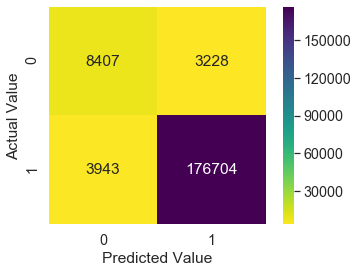

In [52]:
# model prediction for decision tree
# Fit it to the data
tree.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = tree.predict(X_test)

# generate the classification report
print(classification_report(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# display the plot
plt.show()

#### 4.3.3 Random Forest

The same operation for cross-validation were performed here again. The random forest algorithm provides an average accuracy score of 0.977 which is better than the decision tree but not as good as the logistic regression. The comparison of confusion matrix and classification report also indicate that the logistic regression is better at predicting good and bad loans.

In [53]:
# instantiate Random Forest Classifier
ranfor = RandomForestClassifier(n_estimators=3)

# compute 3-fold cross-validation scores
ranfor_cv = cross_val_score(ranfor, X_train, y_train, cv=3, scoring='accuracy')

# Print the 3-fold cross-validation scores
print("Average 3-Fold CV Accuracy Score: {}".format(np.mean(ranfor_cv)))

Average 3-Fold CV Accuracy Score: 0.9766280775111555


              precision    recall  f1-score   support

           0       0.91      0.67      0.77     11635
           1       0.98      1.00      0.99    180647

    accuracy                           0.98    192282
   macro avg       0.94      0.83      0.88    192282
weighted avg       0.97      0.98      0.97    192282



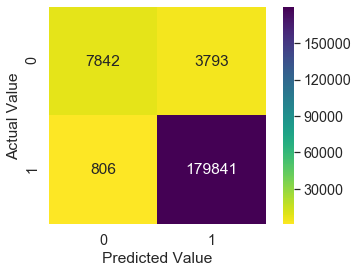

In [54]:
# model prediction for random forest
# Fit it to the data
ranfor.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = ranfor.predict(X_test)

# generate the classification report
print(classification_report(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# display the plot
plt.show()

# 5. Model Building (Balanced Data)

Here, we will balance the number of good and bad loans using Synthetic Minority Oversampling Technique(SMOTE). We will be oversampling the minority class of bad loans to 300,000 and perform the same machine learning algorithms again.   

#### 5.1 Balancing Training Dataset - SMOTE

In [55]:
# extract the features and the response variable
y = df1['loan_status']
X = df1.drop('loan_status', axis=1)

In [56]:
# Splitting the dataset in training (75%) and testing set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=y)

In [57]:
# scale X_train numeric continuous features
scaler = StandardScaler()
numeric_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')].to_list()
scaler.fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

# scale X_test numeric continuous features
numeric_cols = X_test.columns[(X_test.dtypes == 'float64') | (X_test.dtypes == 'int64')].to_list()
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [58]:
# oversampling using SMOTE
sm = SMOTE(random_state=27, sampling_strategy={1:541942, 0:300000})
X_train, y_train = sm.fit_sample(X_train, y_train)

In [59]:
y_train.value_counts()

1    541942
0    300000
Name: loan_status, dtype: int64

#### 5.2 Model Fitting

 Candidates for Model Algorithms: 
 
    . Logistic Regression
    . Decision Tree
    . Random Forest

#### 5.2.1 Logistic Regression 

In [60]:
# instantiate Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Compute 3-fold cross-validation scores
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=3, scoring='accuracy')

# Print the 3-fold cross-validation scores
print("Average 3-Fold CV Accuracy Score: {}".format(np.mean(logreg_cv)))

Average 3-Fold CV Accuracy Score: 0.9472457919729869


              precision    recall  f1-score   support

           0       0.73      0.71      0.72     11635
           1       0.98      0.98      0.98    180647

    accuracy                           0.97    192282
   macro avg       0.85      0.85      0.85    192282
weighted avg       0.97      0.97      0.97    192282



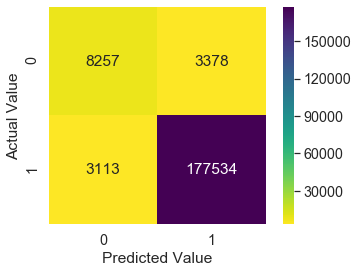

In [61]:
# model prediction for logistic regression
# Fit it to the data
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)

# generate the classification report
print(classification_report(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# display the plot
plt.show()

#### 5.2.2 Decision Tree

In [62]:
# instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()

# compute 3-fold cross-validation scores
tree_cv = cross_val_score(tree, X_train, y_train, cv=3, scoring='accuracy')

# Print the 3-fold cross-validation scores
print("Average 3-Fold CV Accuracy Score: {}".format(np.mean(tree_cv)))

Average 3-Fold CV Accuracy Score: 0.9517793456174887


              precision    recall  f1-score   support

           0       0.57      0.73      0.64     11635
           1       0.98      0.97      0.97    180647

    accuracy                           0.95    192282
   macro avg       0.78      0.85      0.81    192282
weighted avg       0.96      0.95      0.95    192282



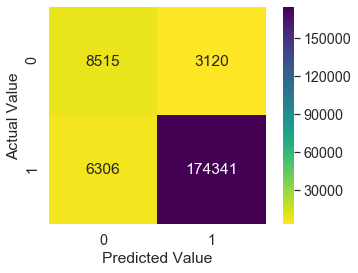

In [63]:
# model prediction for decision tree
# Fit it to the data
tree.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = tree.predict(X_test)

# generate the classification report
print(classification_report(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# display the plot
plt.show()

#### 5.2.3 Random Forest

In [64]:
# instantiate Random Forest Classifier
ranfor = RandomForestClassifier(n_estimators=3)

# compute 3-fold cross-validation scores
ranfor_cv = cross_val_score(ranfor, X_train, y_train, cv=3, scoring='accuracy')

# Print the 3-fold cross-validation scores
print("Average 3-Fold CV Accuracy Score: {}".format(np.mean(ranfor_cv)))

Average 3-Fold CV Accuracy Score: 0.9487589532102332


              precision    recall  f1-score   support

           0       0.67      0.71      0.69     11635
           1       0.98      0.98      0.98    180647

    accuracy                           0.96    192282
   macro avg       0.83      0.84      0.83    192282
weighted avg       0.96      0.96      0.96    192282



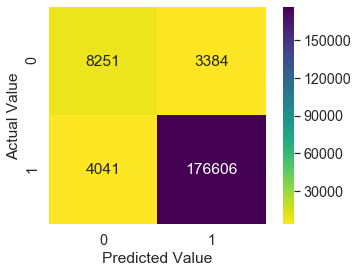

In [65]:
# model prediction for random forest
# Fit it to the data
ranfor.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = ranfor.predict(X_test)

# generate the classification report
print(classification_report(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# display the plot
plt.show()

Across models, even though the decision tree model provided the highest accuracy score, it is not doing as well as the logistic regression and random forest in predicting good and bad loans based on the results of the confusion matrix and classification report. 

# 6. Conclusion

We succesfully built a machine learning algorithm which predicts good and bad loans. The exploratory data analysis and machine learning algorithm can help the LendingClub identify risky loans. 

When we were working on this project, the LendingClub revealed data for years between 2015 and 2018. We can update our dataset by adding these years and see the number of current loans which were defaulted or charged off. The new data can also be added in our current dataset to improve our training data. 